<h2>Dataframe matplotlib-grafiikaksi - perusasiat</h2>

<ul><li>Jos teen kaavion suoraan dataframesta (df.plot...), niin käytän pandas-kirjaston matplotlibin pohjalta rakennettua "viritelmää" kaavion teosta.
    <br>Lue lisää <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html" target="_blank">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html</a></li>
<li>matplotlib.pyplot sisältää komentoja kaavion muotoiluun. Aivan kaikkea näillä komennoilla ei saa tehtyä. 
    <br>Lue lisää <a href="https://matplotlib.org/tutorials/introductory/pyplot.html" target="_blank">https://matplotlib.org/tutorials/introductory/pyplot.html</a></li>
    <li>Vannoutuneet olio-ohjelmoijat käyttävät mieluummin kaavion luonnin palauttamaa <b>axes</b>-luokan oliota kaavion muotoiluun.
    <br>Lue lisää <a href="https://matplotlib.org/api/axes_api.html" target="_blank">https://matplotlib.org/api/axes_api.html</a></li></ul>
    
Seuraavassa teen kaaviot suoraan dataframesta ja käytän muotoiluun axes-oliota.

In [1]:
#Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Valmiit tyylit</h3>

Valmista tyyliä käyttämällä saat nopeasti tuunattua grafiikan ulkoasua.

Tyylin voit ottaa käyttöön <b>plt.style.use('tyylin nimi')</b> -komennolla.

In [2]:
#Tarjolla olevien tyylien listaus
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
#plt.style.use('seaborn-whitegrid')

<h3>Dataframesta kaavioksi</h3>

- <b>df.plot()</b> luo viivakaavion
- Muita kaaviolajeja <b>df.plot.bar(), df.plot.barh(), df.plot.hist(), df.plot.scatter(), df.boxplot()</b>
- Jos aiot muotoilla kaaviota, niin sijoita se muuttujaan. Kaavion luonti palauttaa axes-luokan olion.

In [4]:
#Dataframe
df = pd.DataFrame({'Mies':[17,15,6],'Nainen':[8,15,21]},
                 index=['Tyytymätön','Ei tyytymätön eikä tyytyväinen','Tyytyväinen'])
df

,Mies,Nainen
Tyytymätön,17,8
Ei tyytymätön eikä tyytyväinen,15,15
Tyytyväinen,6,21


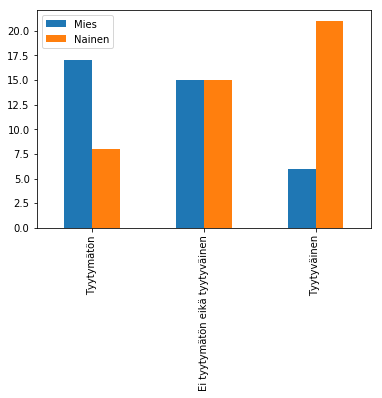

In [5]:
#Tallenna kaavio muuttujaan, joka on axes-luokan olio
ax = df.plot.bar()

<h3>Otsikot</h3>

- Pääotsikko <b>ax.set_title('Otsikko')</b>
- Akselien otsikot <b>ax.set_xlabel('x-otsikko'), ax.set_ylabel('y-otsikko')</b>

Text(0, 0.5, 'Lukumäärä')

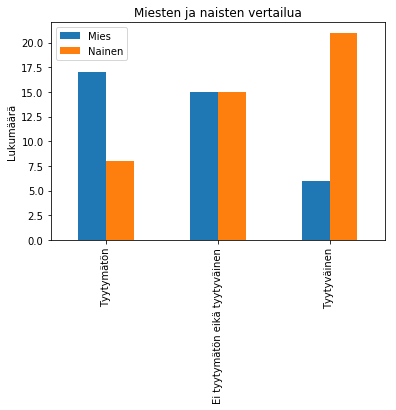

In [6]:
ax=df.plot.bar()

ax.set_title('Miesten ja naisten vertailua')
ax.set_ylabel('Lukumäärä')

<h3>Akselit</h3>

- Akselien skaalaus: <b>ax.set_xlim(0, 5), ax.set_ylim(0, 5)</b>
- Akselien jakoviivat: <b>ax.set_xticks([1, 2, 3, 4, 5]), ax.set_yticks([])</b>
- Akselien jakoviivojen nimiöt: <b>ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'], rotation=0, fontsize=10), ax.set_yticklabels([], rotation=0, fontsize=10)</b>
- Akselien jakoviivojen tuunausta: <b>ax.tick_params(axis='both', labelrotation=0, length=0)</b>
- Jakoviivojen numeromutoilua: <b>ax.set_xticklabels(['{:.0f} %'.format(x) for x in ax.get_xticks()])</b>
- Akselien kääntö: <b>ax.invert_xaxis(), ax.invert_yaxis()</b>
- Jakoviivojen mukainen taustaviivoitus: <b>ax.grid(axis='x'), ax.grid(axis='y')</b>
- Taustaviivoitus pylväiden ym. taakse: <b>ax.set_axisbelow(True)</b>

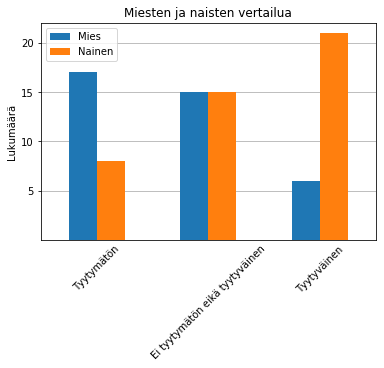

In [7]:
ax=df.plot.bar()

ax.set_title('Miesten ja naisten vertailua')
ax.set_ylabel('Lukumäärä')

ax.set_yticks([5, 10, 15, 20])
ax.tick_params(axis='x', labelrotation=45, length=0)
ax.grid(axis='y')
ax.set_axisbelow(True)

<h3>Selite</h3>

- Selitteen piilotus: <b>ax.legend().set_visible(False)</b>
- Selitteen sijainti ja sarakkeiden määrä: <b>ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)</b>

Lisätietoa legend-oliosta: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

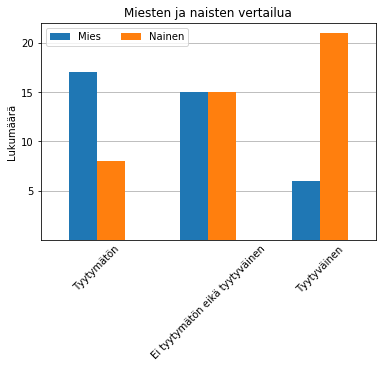

In [8]:
ax=df.plot.bar()

ax.set_title('Miesten ja naisten vertailua')
ax.set_ylabel('Lukumäärä')
ax.set_yticks([5, 10, 15, 20])
ax.tick_params(axis='x', labelrotation=45, length=0)
ax.grid(axis='y')
ax.set_axisbelow(True)

ax.legend(ncol=2)

<h3>Fontti</h3>

- Oletusasetusten palautus <b>plt.rcdefaults()</b>

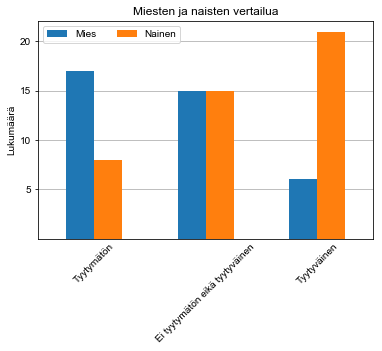

In [9]:
ax=df.plot.bar()

ax.set_title('Miesten ja naisten vertailua')
ax.set_ylabel('Lukumäärä')
ax.set_yticks([5, 10, 15, 20])
ax.tick_params(axis='x', labelrotation=45, length=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.legend(ncol=2)

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

<h3>Kuvion tallentaminen</h3>

- Tiedostonimen tarkennin määrittää tallennusformaatin
- Ilman lisäparametria <b>bbox_inches='tight'</b> kaavion reunoilta voi jäädä osia tallentumatta

In [10]:
plt.gcf().canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

In [11]:
plt.savefig('testi.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

<h3>Usean kaavion kuviot</h3>

- Kaavio on aina <b>figure</b> (kuvio) -olion sisällä. 
- <b>Figure</b>-olion sisään voin sijoittaa useita kaavioita <b>plt.subplots()</b>-funktiolla
- <b>plt.subplots()</b> palauttaa <b>figure</b>-olion ja kokoelman <b>axes</b>-olioista.

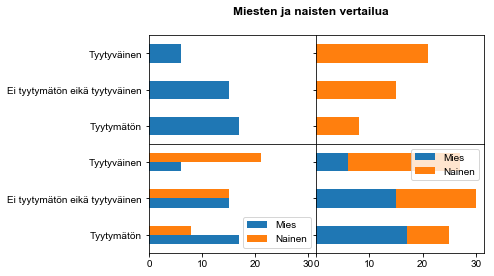

In [12]:
#2x2 kaaviomatriisi
#sharex- ja sharey-lisäparametreilla asetan yhteiset akselit
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

#Figuren otsikko
fig.suptitle('Miesten ja naisten vertailua', fontsize=12, fontweight='bold')

df['Mies'].plot.barh(ax=axes[0,0])
df['Nainen'].plot.barh(stacked=True, color='C1', ax=axes[0,1])
df.plot.barh(ax=axes[1,0])
df.plot.barh(stacked=True, ax=axes[1,1])

#kaaviot kiinni toisiinsa
plt.subplots_adjust(wspace=0, hspace=0)